# Demonstration of how to use m31_frame

This notebook shows you how to create an Aitoff plot of the M31 satellite system using m31_frame. For the data it uses Andrew Pace's Local Volume dwarf galaxy database (version provided in this distribution was last downloaded in May 2024 from https://github.com/apace7/local_volume_database).

There are two options you can use for your projection: Either Conn et al. 2013's version (), which is also used in Savino et al 2022 (). Or, Metz et al. 2007 which corrects for the offset of the solar system from the Galactic centre. The two result in slightly different results (with Metz reflected about the l direction cf Conn).

Code can be adapted to any other galaxy. One would only need the inclination, position angle, coordinates and distance of the host.

In [23]:
import numpy as np
from astropy.coordinates import SkyCoord
import matplotlib.pylab as plt
import astropy.units as u
import pandas as pd
import m31_frame as m31

In [3]:
###------------------------------------------------
# Define plot style - Michelle's preferences
###------------------------------------------------

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

fsize = 18
tsize = 15
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 1.8
lhandle = 2.0

plt.style.use('default')
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['text.usetex']=True
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in' 

left = b1 = 0.15
width = 0.75
h1 = 0.75
height = 0.75

In [7]:
###------------------------------------------------
# Read in necessary data from Pace database
###------------------------------------------------

data = pd.read_csv('dwarf_all.csv')
m_31 = data.host == 'm_31'
mv_m31 = data.M_V[m_31].values
n_m31= data.name[m_31].values
c_a = SkyCoord(data.ra[m_31].values,data.dec[m_31].values, unit= (u.deg, u.deg))

# Convert distance modulus to distance in kpc
dm_m31 = data.distance_modulus[m_31].values
dme_u = data.distance_modulus_ep[m_31].values
dme_d = data.distance_modulus_ep[m_31].values

dist_m31 = 10**((dm_m31+5)/5) /1000
dist_m31_eu = (10**((dm_m31+dme_u+5)/5)- 10**((dm_m31+5)/5))/1000
dist_m31_ed = (10**((dm_m31+5)/5)- 10**((dm_m31-dme_d+5)/5))/1000

# Create short names for the Aitoff plot (optional)

shortname = np.array(('AndI', 'AndII', 'AndIII', 'AndV', 'AndVI',
 'AndVII', 'AndIX', 'AndX' ,'AndXI',
 'AndXII', 'AndXIII', 'AndXIV', 'AndXV',
 'AndXVI' ,'AndXVII' ,'AndXVIII' ,'AndXIX',
 'AndXX', 'AndXXI', 'AndXXII', 'AndXXIII',
 'AndXXIV', 'AndXXV', 'AndXXVI', 'AndXXVII',
 'AndXXVIII', 'AndXXIX', 'CasII' ,'CasIII',
 'IC10' ,'LacI' ,'LGS3' ,'M32', 'NGC147', 'NGC185', 'NGC205',
 'PegV' ,'PerI'))

# Conn projection example

In [26]:
###--------------------------------------------------
# Calculate l, b and track uncertainites using line of 
# sight distance errors in M31 centric frame,and wrap 
# to correctly project in mpl Aitoff coordinates
###--------------------------------------------------

# Empty lists for M31 l and b, plus uncertainty tracks in l and b

m31_l = []
m31_b =[]
r_new = []
l_track = []
b_track = []

for i in range(len(c_a)):

    m31_lb = m31.radec2m31_conn(c_a[i],dist_m31[i])
    
    # Coordinates
    m31_l.append(m31_lb[0])
    m31_b.append(m31_lb[1])
    r_new.append(m31_lb[2])

    # Track uncertainties - can probably wrap into main function
    track = m31.aitoff_error_conn(c_a[i],dist_m31[i], dist_m31_eu[i],dist_m31_ed[i])
    l_track.append(track[0])
    b_track.append(track[1])
    
# Final coordinates to plot

coord_m31 = SkyCoord(np.array(m31_l) *u.deg, np.array(m31_b)*u.deg)
l_rad_a = coord_m31.ra.wrap_at(180 * u.deg).radian
b_rad_a = coord_m31.dec.radian

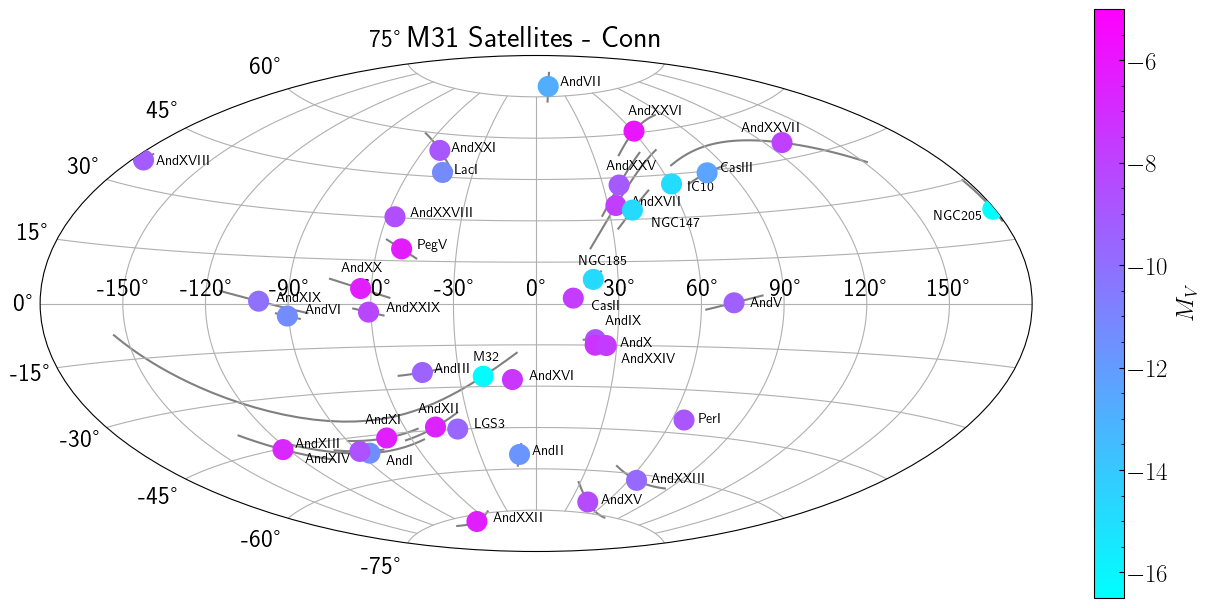

In [27]:
###--------------------------------------------------
# Aitoff plot, Conn projection with uncertainties
###--------------------------------------------------

plt.figure(figsize=(16,6.2))
plt.subplot(111, projection="aitoff")
plt.title("M31 Satellites - Conn")
plt.grid(True)

for i in range(len(l_rad_a)):
    coord_track = SkyCoord(l_track[i] *u.deg, b_track[i] * u.deg)
    l_t = coord_track.ra.wrap_at(180 * u.deg).radian
    b_t = coord_track.dec.radian
    plt.plot(l_t, b_t, c = '0.5', zorder=0)

plt.scatter(l_rad_a, b_rad_a, marker = 'o', s=200, c = mv_m31, cmap = 'cool',vmin = -16.5, vmax = -5, zorder=100)
plt.subplots_adjust(top=0.95,bottom=0.0)
cbar =plt.colorbar()
cbar.set_label(r"$M_V$")


# Hand-adjusted coordinates for label positions. Not repeated for Metz...

ra_label = np.array((-1.4447799, -0.0395445,  -0.68662533 , 1.35428163, -1.46396749 , 0.55146145,
  0.4398822 , 0.54364037, -1.32835162, -0.88955328, -2.02561548, -2.08940223,
  0.99682679, -0.04990256,  0.69091321, -2.95408543, -1.64686065, -1.25032916,
 -0.79310673, -0.95542947,  1.3052977 ,  0.56521172,  0.5878727,  1.1863809,
  2.0559465, -0.88792513, -0.9488318 ,  0.34447749,  1.49930536,  1.15577363,
 -0.6728123 , -0.4946433,  -0.40991668,  0.79876793,  0.27419374,  2.7032105,
 -0.77841983,  1.26494631))

dec_label = np.array((-0.95358688, -0.95487473, -0.42634451,  -0.0155082, -0.05520063,  1.37621663,
 -0.12759339, -0.26287641, -0.70892771, -0.66455258, -0.79132692, -0.8688633,
 -1.24172767, -0.47975194,  0.61288749,  0.63124425,  0.01517208,  0.19261931,
  0.94584568, -1.35783599, -1.08303034, -0.36526179,  0.83937027,  1.16084844,
  0.96622119,  0.54018003, -0.04612598,  -0.03250107,  0.77543666,  0.6876448,
  0.81516044, -0.77882679, -0.3585372,   0.48025529,  0.25035247,  0.3915195,
  0.34231708, -0.71139452))


for i, txt in enumerate(shortname):
    plt.annotate(txt, (ra_label[i], dec_label[i]),fontsize = 10)
plt.show()

# Metz projection

In [16]:
###--------------------------------------------------
# Calculate l, b and track uncertainites using line of 
# sight distance errors in M31 centric frame,and wrap 
# to correctly project in mpl Aitoff coordinates
###--------------------------------------------------

# Empty lists for M31 l and b, plus uncertainty tracks in l and b

m31_l = []
m31_b =[]
r_new = []
l_track = []
b_track = []


for i in range(len(c_a)):

    m31_lb = m31.radec2m31_metz(c_a[i],dist_m31[i])
    
    # Coordinates
    m31_l.append(m31_lb[0])
    m31_b.append(m31_lb[1])
    r_new.append(m31_lb[2])

    # Track uncertainties 
    track = m31.aitoff_error_metz(c_a[i],dist_m31[i], dist_m31_eu[i],dist_m31_ed[i])
    l_track.append(track[0])
    b_track.append(track[1])
    
# Final coordinates to plot

coord_m31 = SkyCoord(np.array(m31_l) *u.deg, np.array(m31_b)*u.deg)
l_rad_a = coord_m31.ra.wrap_at(180 * u.deg).radian
b_rad_a = coord_m31.dec.radian

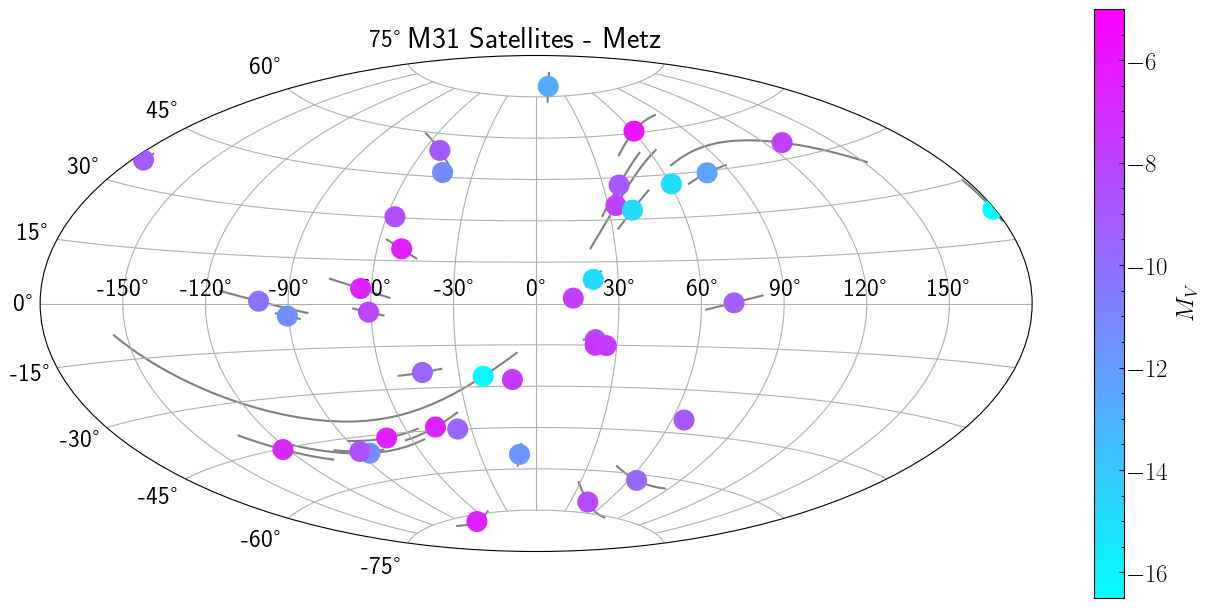

In [25]:
###--------------------------------------------------
# Aitoff plot, Metz projection with uncertainties
###--------------------------------------------------

plt.figure(figsize=(16,6.2))
plt.subplot(111, projection="aitoff")
plt.title("M31 Satellites - Metz")
plt.grid(True)

for i in range(len(l_rad_a)):
    coord_track = SkyCoord(l_track[i] *u.deg, b_track[i] * u.deg)
    l_t = coord_track.ra.wrap_at(180 * u.deg).radian
    b_t = coord_track.dec.radian
    plt.plot(l_t, b_t, c = '0.5', zorder=0)

plt.scatter(l_rad_a, b_rad_a, marker = 'o', s=200, c = mv_m31, cmap = 'cool',vmin = -16.5, vmax = -5, zorder = 100)
plt.subplots_adjust(top=0.95,bottom=0.0)
cbar =plt.colorbar()
cbar.set_label(r"$M_V$")
